In [1]:
import numpy as np
from scipy import special as sf
import matplotlib.pyplot as plt
from sobol import RandomState
%matplotlib inline

In [2]:
def box_muller(sample):
    spread = np.sqrt(-2.0 * np.log(1.0 - sample))
    return spread

In [3]:
def springer_moro(sample):
    spread = np.zeros_like(sample)
    spread[sample >= .5] = np.sqrt(4.0) * sf.erfinv(2*sample[sample >= .5] - 1)
    spread[sample < .5]  = np.sqrt(4.0) * sf.erfinv(1 - 2*sample[sample < .5])
    return spread

In [4]:
def plot_2d():
    dim = np.array([200, 2])
    rng = RandomState(2, randomize=False, nmax=1000)
    q_seq = rng.rand(dim)
    
    fig, axs = plt.subplots(ncols=3, 
                            subplot_kw={'aspect': 1}, 
                            figsize=(10, 5))
    axs[0].plot(*q_seq.T, '*')
    axs[1].plot(*box_muller(q_seq).T, '*')
    axs[2].plot(*springer_moro(q_seq).T, '*')
    
    for ax in axs[1:]:
        ax.set_xlim([-4, 4])
        ax.set_ylim([-4, 4])

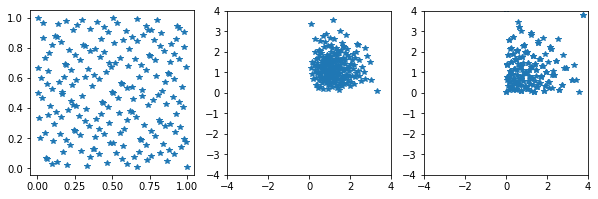

In [5]:
plot_2d()